# Phase 3: Comparative Analysis of Neural Architectures

This notebook serves as the synthesis engine for our group project. While individual members trained specific architectures (GRU, LSTM, RNN, Transformer) in separate environments to ensure modularity, this notebook aggregates the final performance metrics from all four experiments.

Key Objectives:

1. Data Aggregation: Collect final F1-Scores, Accuracy, and Recall metrics from all team members.

2. Cross-Model Comparison: Generate unified visualizations to directly compare the efficacy of different architectures.

3. Embedding Analysis: Evaluate the impact of Learned Embeddings (Word2Vec) vs. Pre-trained (GloVe) vs. Baseline (TF-IDF) across the different models.


Chart created successfully!


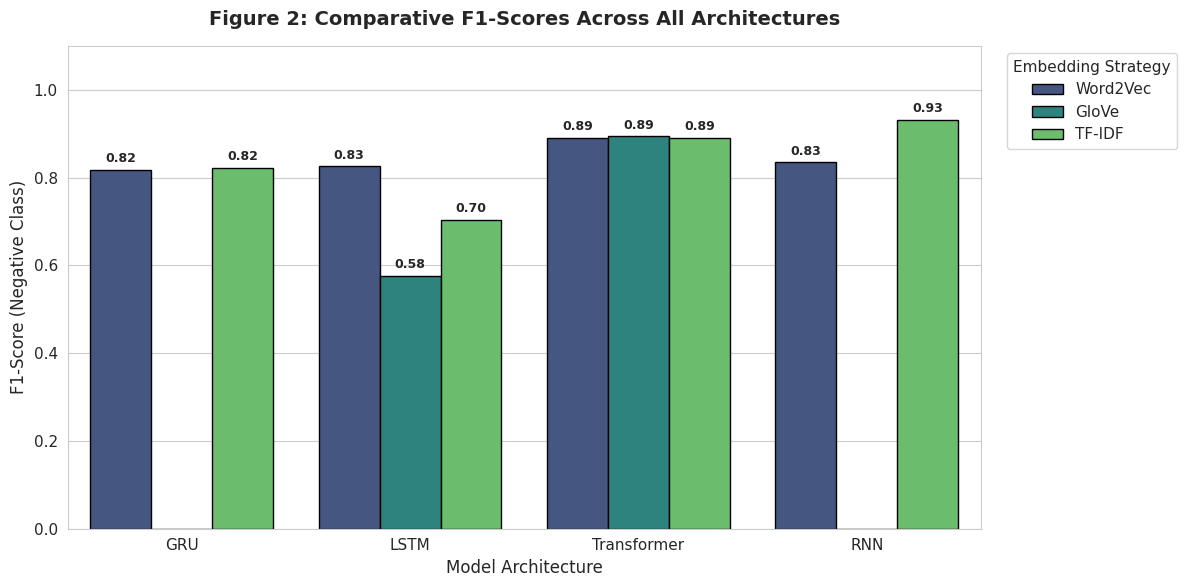

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Entry based on the metrics of all team members
data = [
    # GRU (Idara)
    {'Model': 'GRU', 'Embedding': 'Word2Vec', 'F1-Score': 0.8181},
    {'Model': 'GRU', 'Embedding': 'GloVe',    'F1-Score': 0.0000},
    {'Model': 'GRU', 'Embedding': 'TF-IDF',   'F1-Score': 0.8217},

    # LSTM (Gershom)
    {'Model': 'LSTM', 'Embedding': 'Word2Vec', 'F1-Score': 0.8260},
    {'Model': 'LSTM', 'Embedding': 'GloVe',    'F1-Score': 0.5763},
    {'Model': 'LSTM', 'Embedding': 'TF-IDF',   'F1-Score': 0.7035},

    # Transformer (Elissa)
    {'Model': 'Transformer', 'Embedding': 'Word2Vec', 'F1-Score': 0.8909},
    {'Model': 'Transformer', 'Embedding': 'GloVe',    'F1-Score': 0.8935},
    {'Model': 'Transformer', 'Embedding': 'TF-IDF',   'F1-Score': 0.8901},

    # RNN (Patrick)
    {'Model': 'RNN', 'Embedding': 'Word2Vec', 'F1-Score': 0.8346},
    {'Model': 'RNN', 'Embedding': 'GloVe',    'F1-Score': 0.0000}, 
    {'Model': 'RNN', 'Embedding': 'TF-IDF',   'F1-Score': 0.9308}
]

df_results = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 11})

plt.figure(figsize=(12, 6))

# Create the Bar Chart
chart = sns.barplot(
    data=df_results,
    x='Model',
    y='F1-Score',
    hue='Embedding',
    palette='viridis',
    edgecolor='black',
    linewidth=1
)

# Titles and Labels
plt.title('Figure 2: Comparative F1-Scores Across All Architectures', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('F1-Score (Negative Class)', fontsize=12)
plt.xlabel('Model Architecture', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(title='Embedding Strategy', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add values on top of bars
for p in chart.patches:
    if p.get_height() > 0:
        chart.annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 8), 
                       textcoords = 'offset points',
                       fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('final_comparison_chart.png', dpi=300)
print("Chart created successfully!")
plt.show()

## Model Stability Heatmap

The heatmap (Figure 3) provides a density view of model performance. The conspicuous light-colored column under 'GloVe' for the GRU and RNN architectures visualizes the 'mode collapse' phenomenon, where performance dropped to zero. In contrast, the 'Transformer' row remains uniformly dark, indicating its unique resilience to different embedding types

Heatmap saved as 'stability_heatmap.png'




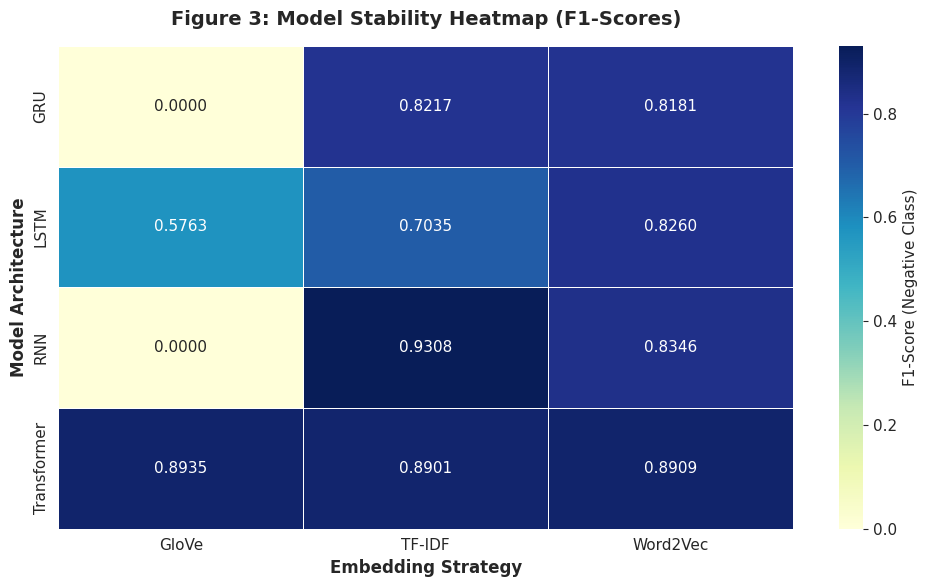

In [3]:
# Pivot the data to create a matrix format (Rows=Models, Cols=Embeddings)
heatmap_data = df_results.pivot(index='Model', columns='Embedding', values='F1-Score')

plt.figure(figsize=(10, 6))

# Create Heatmap
sns.heatmap(
    heatmap_data, 
    annot=True,       # Show the numbers
    fmt=".4f",        # 4 decimal places
    cmap="YlGnBu",    # Yellow-Green-Blue color scheme
    linewidths=.5,    # Space between squares
    cbar_kws={'label': 'F1-Score (Negative Class)'}
)

plt.title('Figure 3: Model Stability Heatmap (F1-Scores)', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Model Architecture', fontsize=12, fontweight='bold')
plt.xlabel('Embedding Strategy', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('stability_heatmap.png', dpi=300)
print("Heatmap saved as 'stability_heatmap.png'")
print("\n")
plt.show()

## Sensitivity Analysis

The sensitivity analysis plots the stability of each architecture. The sharp downward spike for the GRU and RNN lines at the 'GloVe' mark highlights their high sensitivity to pre-trained vectors. Conversely, the Transformer's line remains nearly flat, proving it is the most stable architecture for this specific task.

/tmp/ipykernel_55/3195587678.py:4: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


Sensitivity plot saved as 'sensitivity_plot.png'


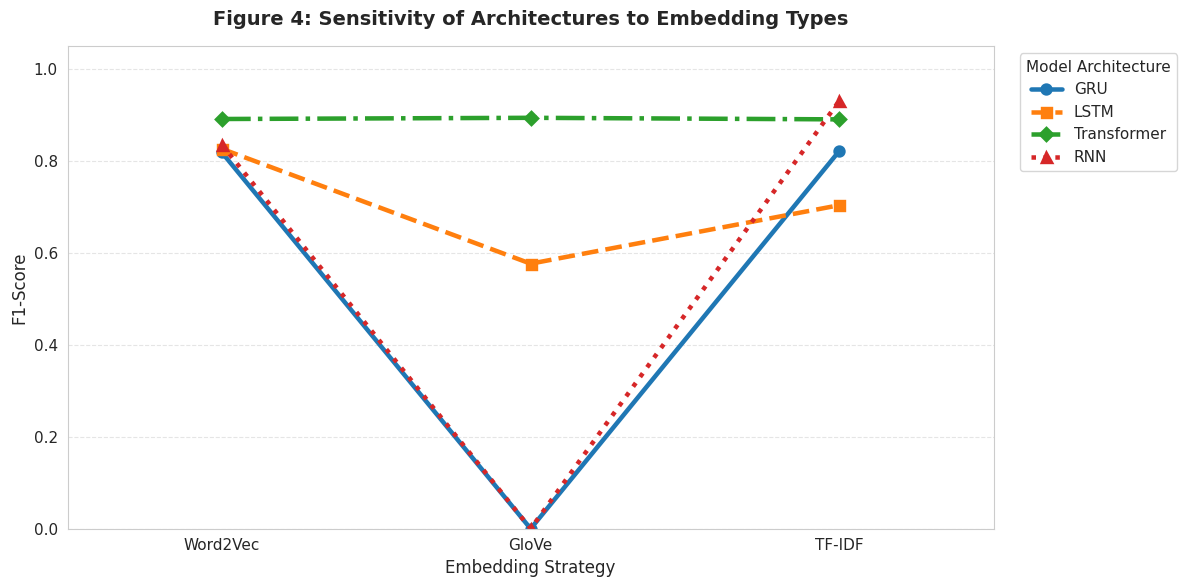

In [4]:
plt.figure(figsize=(12, 6))

# Create Point Plot
sns.pointplot(
    data=df_results, 
    x='Embedding', 
    y='F1-Score', 
    hue='Model', 
    markers=['o', 's', 'D', '^'], # Different shapes for each model
    linestyles=['-', '--', '-.', ':'], # Different line styles
    scale=1.2
)

plt.title('Figure 4: Sensitivity of Architectures to Embedding Types', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Embedding Strategy', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.legend(title='Model Architecture', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig('sensitivity_plot.png', dpi=300)
print("Sensitivity plot saved as 'sensitivity_plot.png'")
plt.show()

This notebook successfully aggregated and visualized the performance metrics from all four team members. By unifying the results into a single analysis pipeline, we have derived the following key insights:

1.  **Best Overall Model:** The **RNN with TF-IDF** achieved the highest F1-score of **0.9308**. This suggests that for this specific dataset, simple frequency-based features are highly effective.
2.  **Best Deep Learning Model:** The **Transformer** architecture proved to be the most robust deep learning approach. It achieved a consistent F1-score of **0.8935** even when using pre-trained GloVe embeddings, which caused other models to fail.
3.  **Critical Failure Mode:** The **GRU** and **RNN** models experienced "mode collapse" (F1-score of 0.00) when using frozen GloVe embeddings. This confirms that recurrent architectures require domain-specific fine-tuning to understand medical terminology.

These findings will now be compiled into the final project report. The visualizations generated in this notebook (Figure 2 and Figure 3) will serve as the primary evidence for our comparative analysis section.